In [619]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

In [620]:
# Coleta de dados
# Dólar (USD/BRL)
dolar = yf.download("USDBRL=X", start="2010-01-01", end="2025-01-01")['Close']
dolar_mensal = dolar.resample('ME').last()
dolar_mensal = ((dolar_mensal - dolar_mensal.shift(1)) / dolar_mensal.shift(1)) * 100
dolar_mensal = dolar_mensal.squeeze()  # Converte DataFrame para Series

[*********************100%***********************]  1 of 1 completed


In [621]:
# IBOVESPA
ibovespa = yf.download("^BVSP", start="2010-01-01", end="2025-01-01")['Close']
ibovespa_mensal = ibovespa.resample('ME').last()
ibovespa_mensal = ((ibovespa_mensal - ibovespa_mensal.shift(1)) / ibovespa_mensal.shift(1)) * 100
ibovespa_mensal = ibovespa_mensal.squeeze()  # Converte DataFrame para Series

[*********************100%***********************]  1 of 1 completed


In [622]:
ipca = pd.read_csv("data/ipca.csv").set_index('Data')["Variacao"]
igp10 = pd.read_csv("data/igp10.csv").set_index('Data')["Variacao"]
inpc = pd.read_csv("data/inpc.csv").set_index('Data')["Variacao"]
igpdi = pd.read_csv("data/igpdi.csv").set_index('Data')["Variacao"]
igpm = pd.read_csv("data/igpm.csv").set_index('Data')["Variacao"]

In [623]:
# Sobrescrever os índices do dólar e IBOVESPA com o índice do IPCA
dolar_mensal.index = ipca.index
ibovespa_mensal.index = ipca.index
igpm.index = ipca.index
igpdi.index = ipca.index
igp10.index = ipca.index
inpc.index = ipca.index



################################################################## oi ##############################################################

In [624]:
# Percebi que os dados de inflacao, dependendo do mes (-1, -2, -3, etc), sao mais correlacionados com o dolar.  
# Ou seja, o dolar reage a inflacao com um atraso. Percebi que o dolar reage a inflacao com um atraso de 4 meses pelo menos.
shift_cotacao = 0
shift_inflacao = 0


In [625]:
# Criar o DataFrame com as séries ajustadas
df_analise = pd.DataFrame({
    'Dolar': dolar_mensal.shift(shift_cotacao),
    'IBOVESPA': ibovespa_mensal.shift(shift_cotacao),
    'IPCA': ipca.shift(shift_inflacao),
    'IGPM': igpm.shift(shift_inflacao),
    'IGPDI': igpdi.shift(shift_inflacao),
    'IGP10': igp10.shift(shift_inflacao),
    'INPC': inpc.shift(shift_inflacao)
})


In [626]:
# Verificar o resultado
df_analise.dropna(inplace=True)
print(df_analise.head())
print("\nForma do DataFrame:", df_analise.shape)


             Dolar  IBOVESPA  IPCA  IGPM  IGPDI  IGP10  INPC
Data                                                        
fev/2010 -3.572001  1.683435  0.78  1.18   1.09   1.08  0.70
mar/2010 -1.411957  5.817783  0.52  0.94   0.63   1.10  0.71
abr/2010 -2.909296 -4.038538  0.57  0.77   0.72   0.63  0.73
mai/2010  4.957478 -6.638531  0.43  1.19   1.57   1.11  0.43
jun/2010 -1.295192 -3.348296  0.00  0.85   0.34   1.30 -0.11

Forma do DataFrame: (179, 7)


In [627]:
# Matriz de correlação
correlacao = df_analise.corr()

In [628]:
correlacao

,Dolar,IBOVESPA,IPCA,IGPM,IGPDI,IGP10,INPC
Dolar,1.000000,-0.609966,-0.059586,-0.052480,-0.010008,-0.065864,-0.033522
IBOVESPA,-0.609966,1.000000,-0.112394,0.000066,-0.055380,0.030524,-0.143448
IPCA,-0.059586,-0.112394,1.000000,0.389653,0.369186,0.389130,0.967234
IGPM,-0.052480,0.000066,0.389653,1.000000,0.929280,0.925328,0.427384
IGPDI,-0.010008,-0.055380,0.369186,0.929280,1.000000,0.772087,0.399344
IGP10,-0.065864,0.030524,0.389130,0.925328,0.772087,1.000000,0.425475
INPC,-0.033522,-0.143448,0.967234,0.427384,0.399344,0.425475,1.000000


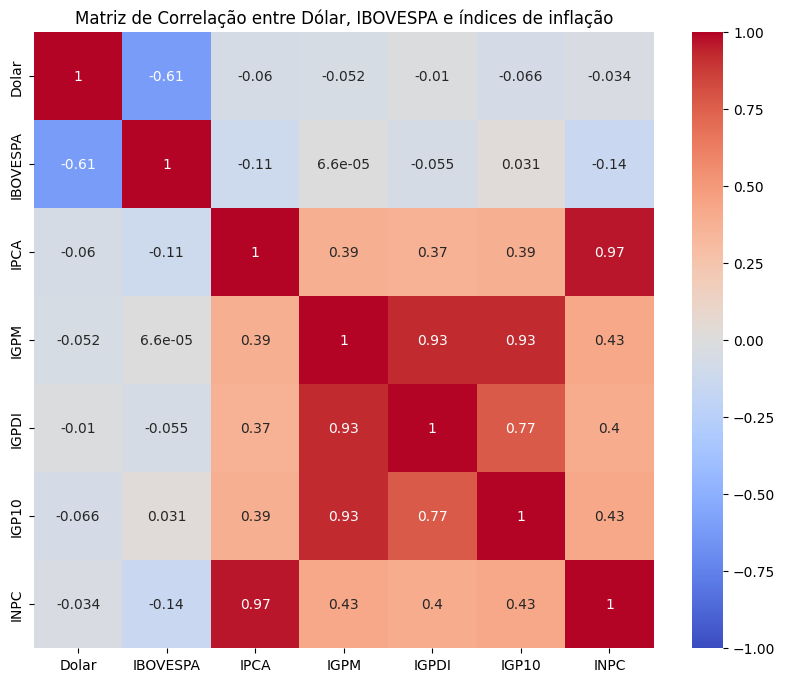

In [649]:
# Visualização da matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlação entre Dólar, IBOVESPA e índices de inflação')
plt.show()


Teste de Causalidade de Granger: Dólar -> IPCA

Teste de Causalidade de Granger: Dólar -> IGPM

Teste de Causalidade de Granger: Dólar -> IGPDI

Teste de Causalidade de Granger: Dólar -> IGP10

Teste de Causalidade de Granger: Dólar -> INPC

Teste de Causalidade de Granger: Dólar -> IBOVESPA


d:\anaconda3\envs\tcc\Lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
d:\anaconda3\envs\tcc\Lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
d:\anaconda3\envs\tcc\Lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
d:\anaconda3\envs\tcc\Lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
d:\anaconda3\envs\tcc\Lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
d:\anaconda3\envs\tcc\Lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print resul

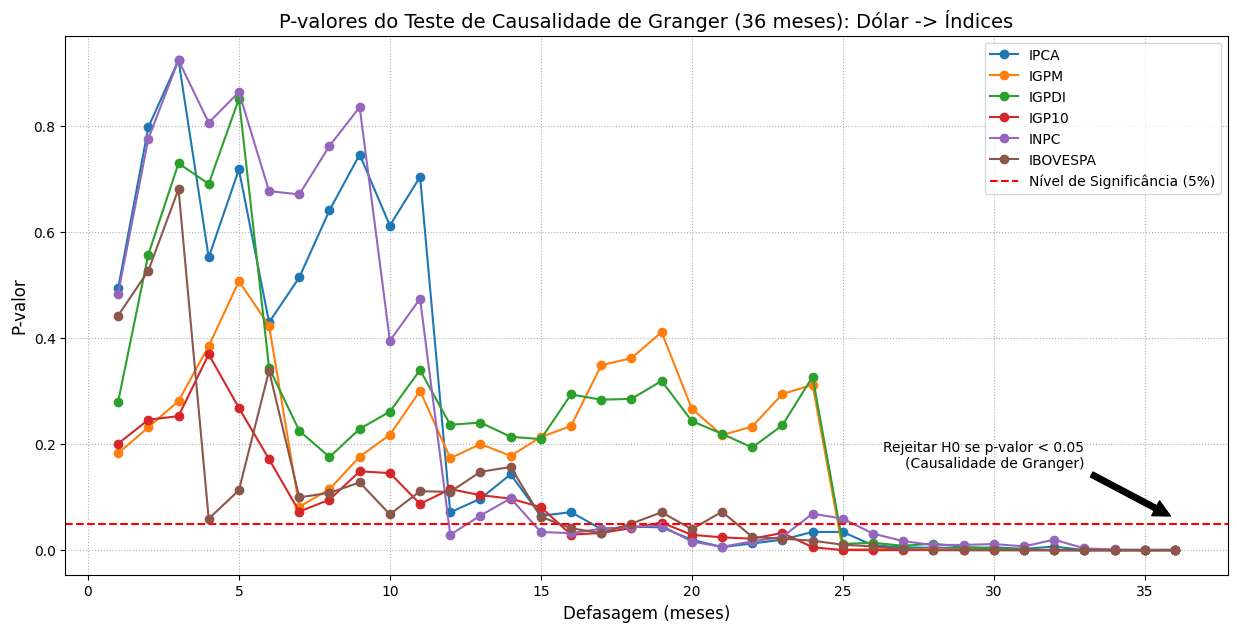

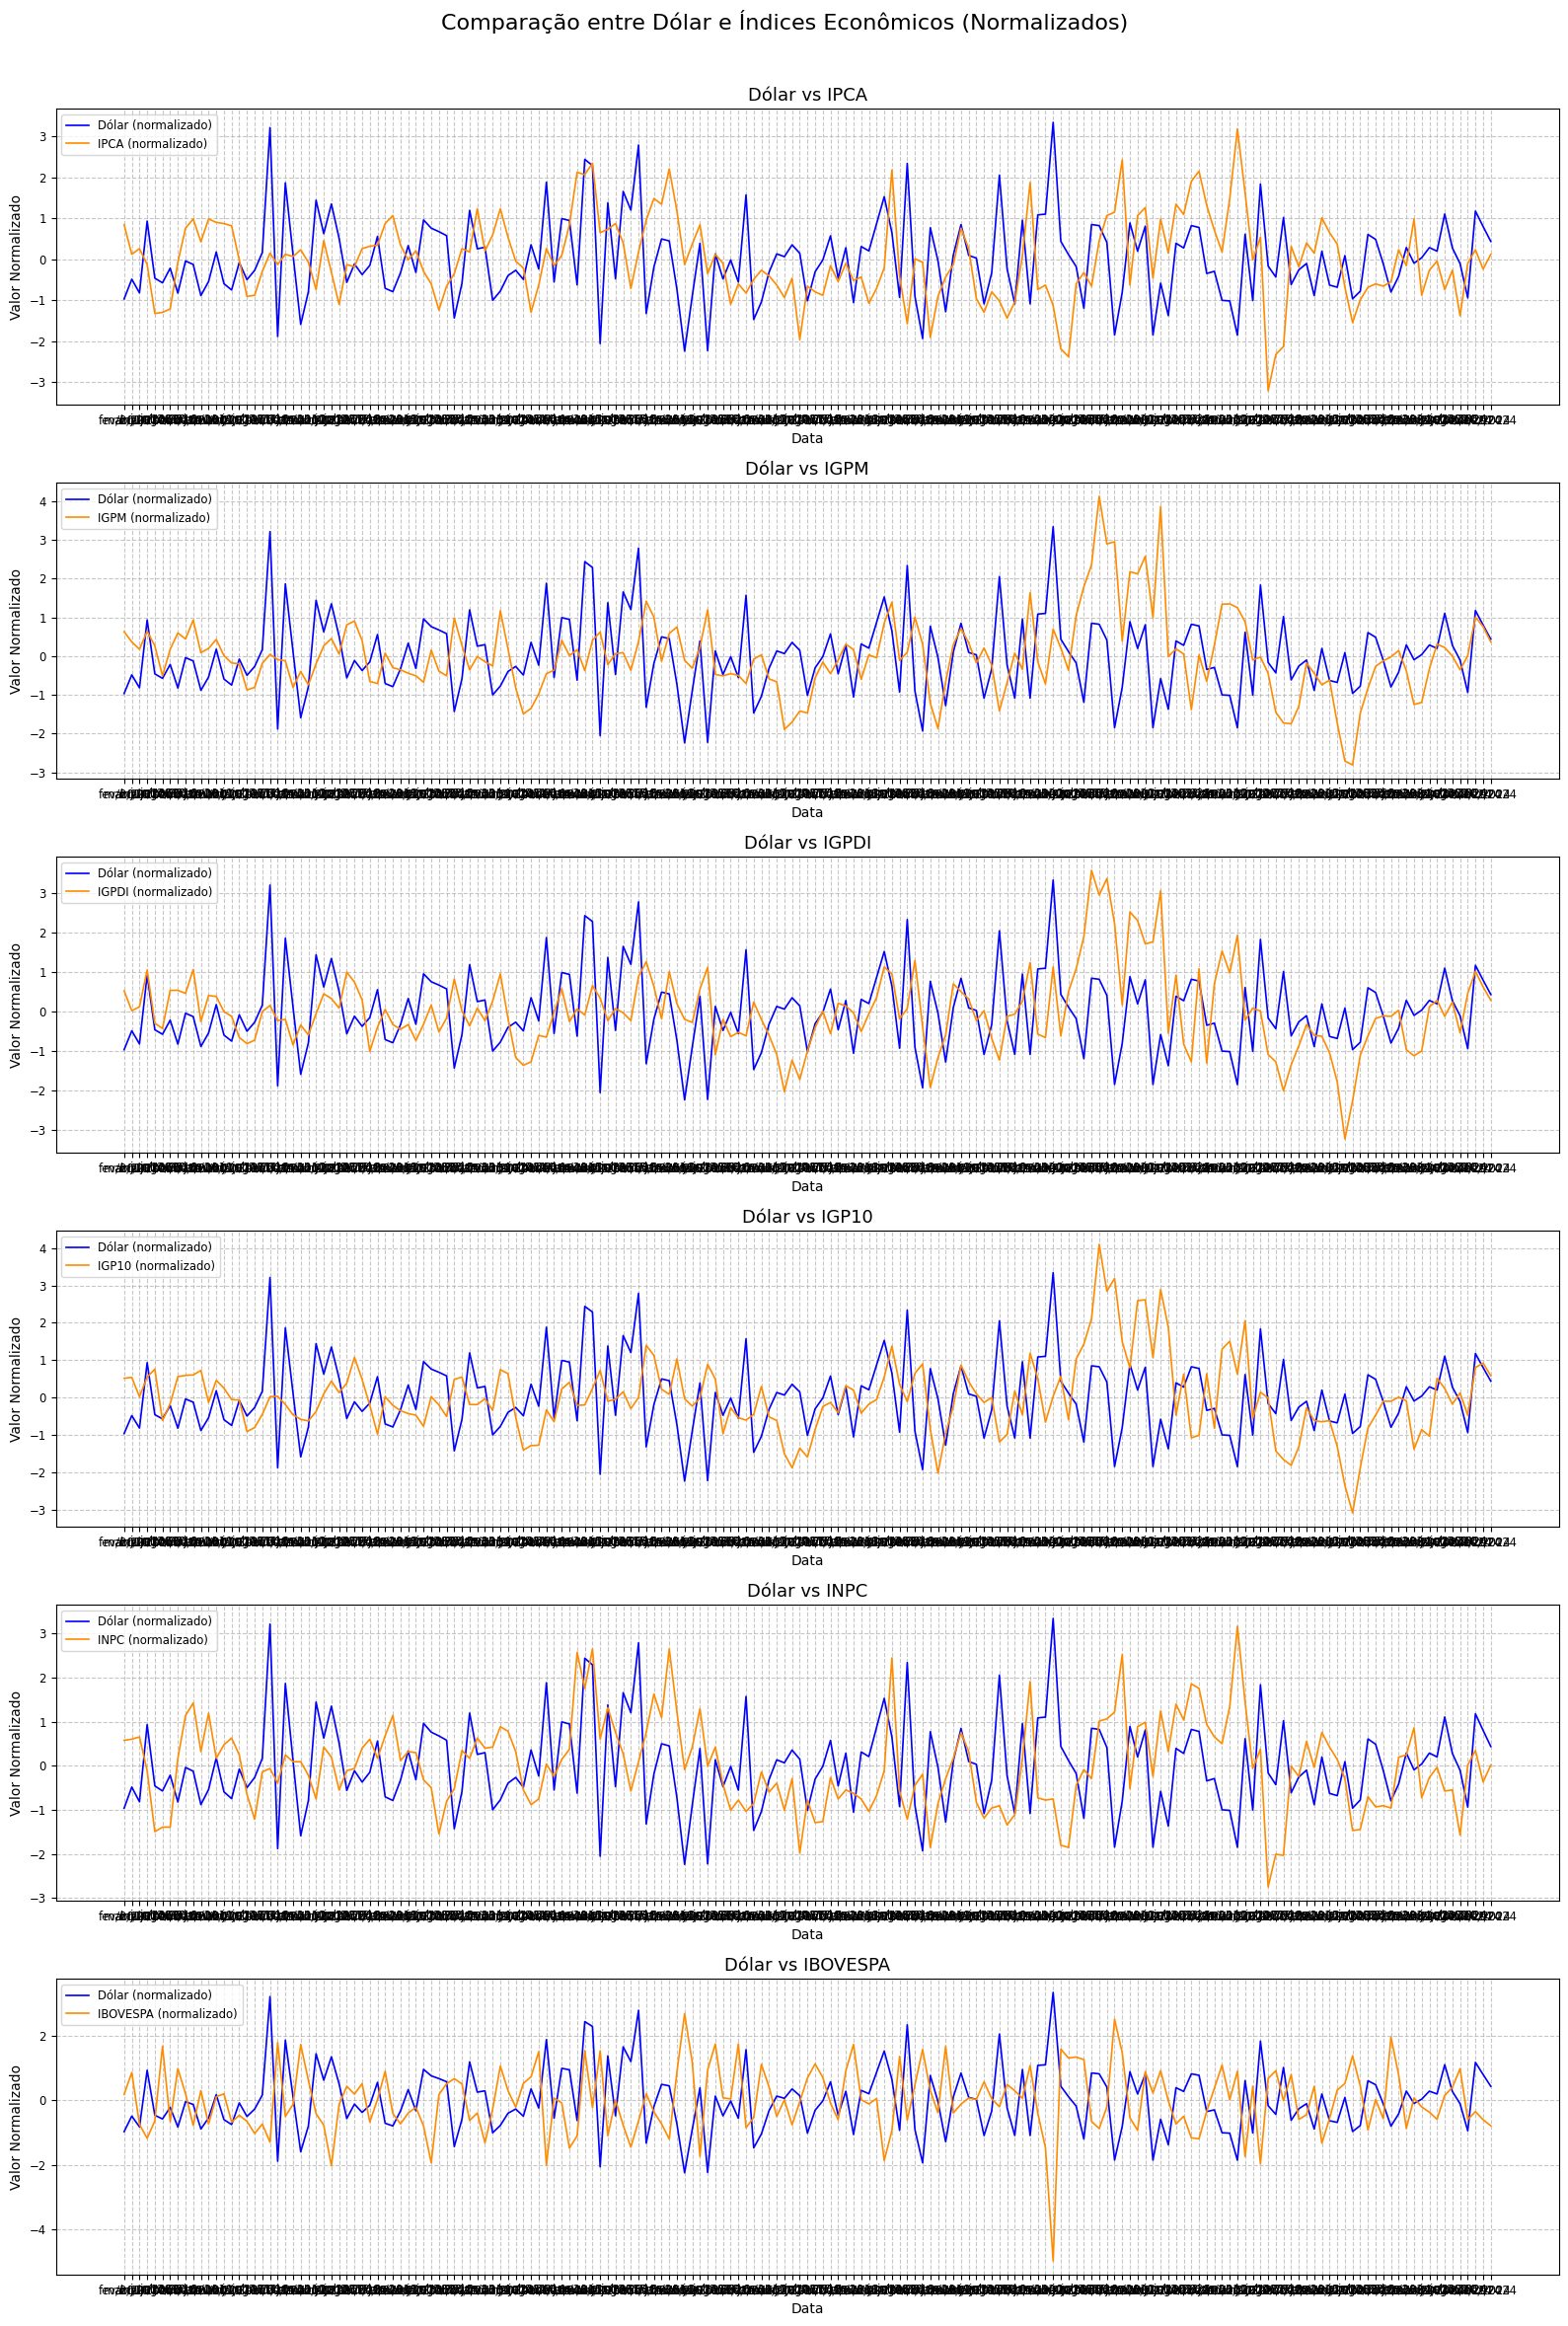

In [654]:
from statsmodels.tsa.stattools import grangercausalitytests

# Lista de índices para análise
indices = ['IPCA', 'IGPM', 'IGPDI', 'IGP10', 'INPC', 'IBOVESPA']
maxlag = 36  # Teste até 12 meses de defasagem

# Loop para realizar o Teste de Causalidade de Granger para cada índice
for indice in indices:
    print(f"\nTeste de Causalidade de Granger: Dólar -> {indice}")
    # A função grangercausalitytests já imprime os resultados,
    # mas podemos comentar para evitar outputs extensos no loop principal
    # grangercausalitytests(df_analise[['Dolar', indice]], maxlag=maxlag, verbose=True) # verbose=True para detalhes

# Função para coletar p-valores do teste de Granger de forma mais eficiente
def get_granger_pvalues(data, var1, var2, maxlag):
    pvalues = []
    for lag in range(1, maxlag + 1):
        # Realiza o teste de causalidade para a defasagem atual
        result = grangercausalitytests(data[[var1, var2]], maxlag=lag, verbose=False)
        # Extrai o p-valor do teste 'ssr_chi2test' (mais comum para Granger)
        # result[lag][0]['ssr_chi2test'][1]  ->  [lag] acesso ao resultado para defasagem 'lag'
        #                                     ->  [0]  acesso ao primeiro conjunto de resultados (há diferentes testes)
        #                                     ->  ['ssr_chi2test']  acessa os resultados do teste 'ssr_chi2test'
        #                                     ->  [1]  acessa o p-valor (o segundo elemento retornado)
        pvalues.append(result[lag][0]['ssr_chi2test'][1])
    return pvalues

# **Melhoria na Visualização do Gráfico de P-valores**
plt.figure(figsize=(15, 7)) # Aumentando um pouco a altura para melhor visualização da legenda

# Coletar e plotar p-valores para cada índice
for indice in indices:
    pvalues = get_granger_pvalues(df_analise, 'Dolar', indice, maxlag)
    plt.plot(range(1, maxlag + 1), pvalues, marker='o', linestyle='-', label=indice) # Adicionado linestyle para melhor distinção das linhas

# Linha de significância estatística (5%) - importante para referência visual
plt.axhline(y=0.05, color='r', linestyle='--', label='Nível de Significância (5%)')

# Adicionando anotações para facilitar a interpretação
plt.annotate('Rejeitar H0 se p-valor < 0.05\n(Causalidade de Granger)',
             xy=(maxlag, 0.06), # Posição da anotação
             xytext=(maxlag -3, 0.15), # Posição do texto
             arrowprops=dict(facecolor='black', shrink=0.05),
             ha='right', va='bottom') # Alinhamento do texto

plt.xlabel('Defasagem (meses)', fontsize=12) # Aumentando o tamanho da fonte dos labels
plt.ylabel('P-valor', fontsize=12)
plt.title('P-valores do Teste de Causalidade de Granger (36 meses): Dólar -> Índices', fontsize=14) # Título mais informativo
plt.legend(loc='upper right') # Posicionando a legenda para evitar sobreposição com as linhas
plt.grid(True, linestyle=':') # Linhas de grade mais discretas para melhor visualização


# **Gráficos de Séries Temporais Lado a Lado para Melhor Comparação**
# Alterando para subplots lado a lado para melhor visualização e comparação direta

num_indices = len(indices)
fig, axes = plt.subplots(num_indices, 1, figsize=(16, 4 * num_indices)) # Ajustando largura para evitar labels cortados
fig.suptitle('Comparação entre Dólar e Índices Econômicos (Normalizados)', fontsize=16) # Título mais claro

for i, indice in enumerate(indices):
    # Normalizar as séries para melhor comparação (mantido)
    dolar_norm = (df_analise['Dolar'] - df_analise['Dolar'].mean()) / df_analise['Dolar'].std()
    indice_norm = (df_analise[indice] - df_analise[indice].mean()) / df_analise[indice].std()

    ax = axes[i] # Acessando o subplot correto
    ax.plot(df_analise.index, dolar_norm, label='Dólar (normalizado)', color='blue', linewidth=1.2) # Aumentando espessura da linha
    ax.plot(df_analise.index, indice_norm, label=f'{indice} (normalizado)', color='darkorange', linewidth=1.2) # Mudando cor para melhor contraste
    ax.set_title(f'Dólar vs {indice}', fontsize=13) # Aumentando tamanho do título do subplot
    ax.legend(loc='upper left', fontsize='small') # Legenda menor e reposicionada
    ax.grid(True, alpha=0.7, linestyle='--') # Grade mais suave
    ax.set_xlabel('Data', fontsize=10)
    ax.set_ylabel('Valor Normalizado', fontsize=10)
    ax.tick_params(axis='both', labelsize='small') # Reduzindo tamanho dos ticks


plt.tight_layout(rect=[0, 0, 1, 0.97]) # Ajustando layout para título superior não ser cortado
plt.show()

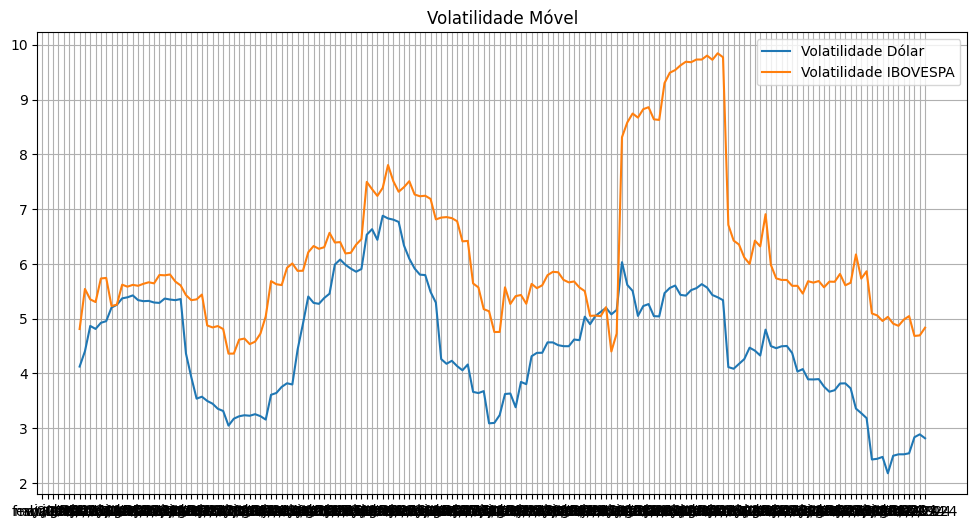

In [655]:
# Calcular a volatilidade móvel (desvio padrão móvel)
janela = 20  # 20 períodos
df_analise['Volatilidade_Dolar'] = df_analise['Dolar'].rolling(window=janela).std()
df_analise['Volatilidade_IBOVESPA'] = df_analise['IBOVESPA'].rolling(window=janela).std()

# Plotar volatilidade
plt.figure(figsize=(12, 6))
plt.plot(df_analise.index, df_analise['Volatilidade_Dolar'], label='Volatilidade Dólar')
plt.plot(df_analise.index, df_analise['Volatilidade_IBOVESPA'], label='Volatilidade IBOVESPA')
plt.title('Volatilidade Móvel')
plt.legend()
plt.grid(True)
plt.show()

In [656]:
from statsmodels.tsa.stattools import coint

# Teste de cointegração entre Dólar e cada índice
for indice in indices:
    score, pvalue, _ = coint(df_analise['Dolar'], df_analise[indice])
    print(f'\nCointegração entre Dólar e {indice}:')
    print(f'p-valor: {pvalue:.4f}')


Cointegração entre Dólar e IPCA:
p-valor: 0.0000

Cointegração entre Dólar e IGPM:
p-valor: 0.0000

Cointegração entre Dólar e IGPDI:
p-valor: 0.0000

Cointegração entre Dólar e IGP10:
p-valor: 0.0000

Cointegração entre Dólar e INPC:
p-valor: 0.0000

Cointegração entre Dólar e IBOVESPA:
p-valor: 0.0000


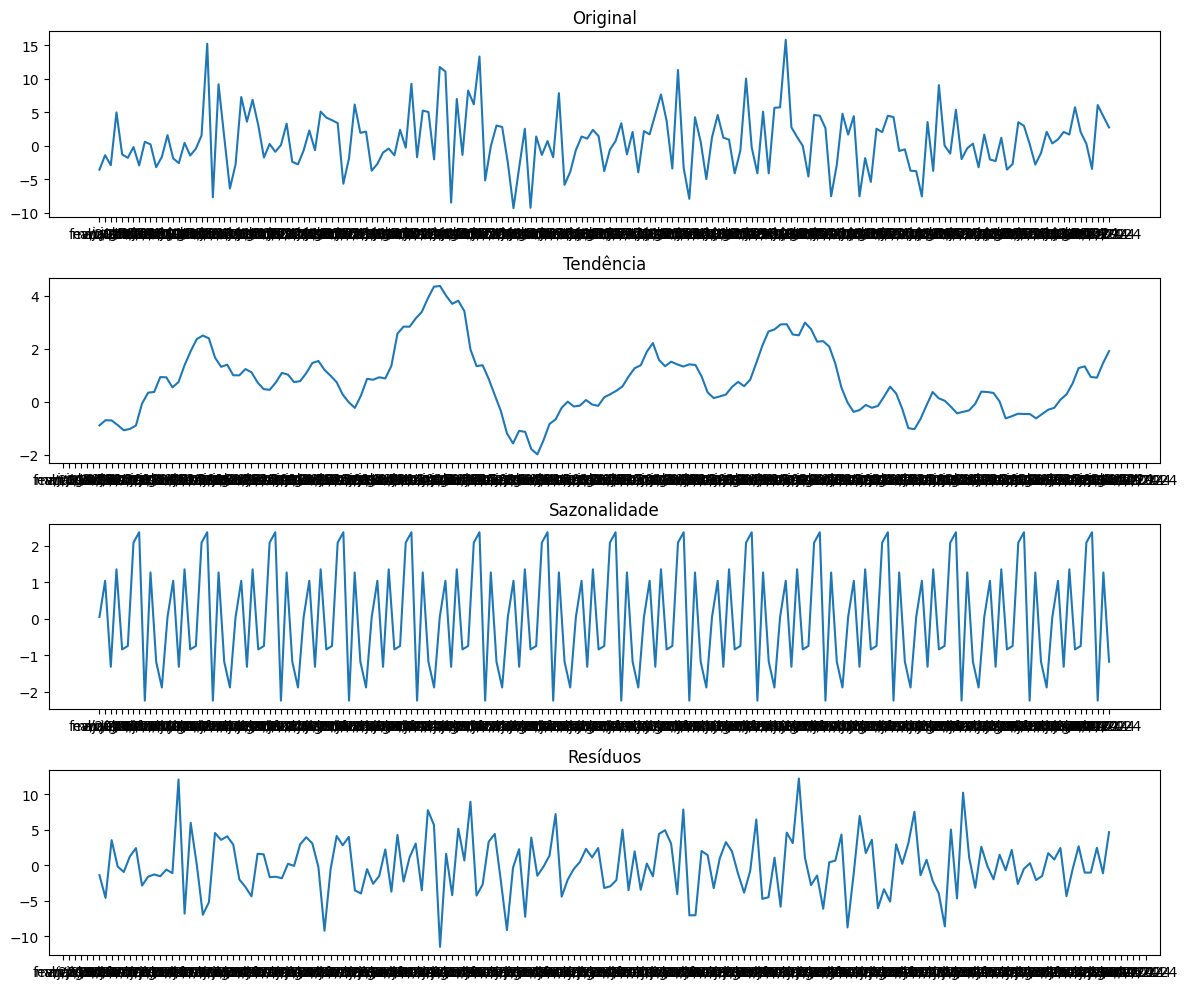

In [657]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompor a série do dólar
decomposicao = seasonal_decompose(df_analise['Dolar'], period=12)

# Plotar decomposição
plt.figure(figsize=(12, 10))
plt.subplot(411)
plt.plot(decomposicao.observed)
plt.title('Original')
plt.subplot(412)
plt.plot(decomposicao.trend)
plt.title('Tendência')
plt.subplot(413)
plt.plot(decomposicao.seasonal)
plt.title('Sazonalidade')
plt.subplot(414)
plt.plot(decomposicao.resid)
plt.title('Resíduos')
plt.tight_layout()
plt.show()